1. Imports & Basic Setup

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 50)
pd.set_option("display.float_format", "{:.4f}".format)

%matplotlib inline

2. Load Raw SECOM Data

In [6]:
sensor_df = pd.read_csv(
    "C:/Users/laptop/Downloads/secom/secom.data",
    sep=" ",
    header=None
)

labels_df = pd.read_csv(
    "C:/Users/laptop/Downloads/secom/secom_labels.data",
    sep=" ",
    header=None,
    names=["label", "timestamp"]
)
print("Sensor data shape:", sensor_df.shape)
print("Labels data shape:", labels_df.shape)

Sensor data shape: (1567, 590)
Labels data shape: (1567, 2)


In [4]:
sensor_df.head()
labels_df.head()

,label,timestamp
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00


3. Process Target Variable

In [7]:
# Drop timestamp (not useful for modeling)
labels_df = labels_df.drop(columns=["timestamp"])

# Convert labels:
#  1  -> PASS (0)
# -1  -> FAIL (1)
labels_df["QC_Failure"] = labels_df["label"].map({1: 0, -1: 1})

labels_df.drop(columns=["label"], inplace=True)

labels_df.head()

,QC_Failure
0,1
1,1
2,0
3,1
4,1


4.  Assign Sensor Column Names

In [8]:
sensor_columns = [f"sensor_{i}" for i in range(sensor_df.shape[1])]
sensor_df.columns = sensor_columns

sensor_df.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,...,sensor_565,sensor_566,sensor_567,sensor_568,sensor_569,sensor_570,sensor_571,sensor_572,sensor_573,sensor_574,sensor_575,sensor_576,sensor_577,sensor_578,sensor_579,sensor_580,sensor_581,sensor_582,sensor_583,sensor_584,sensor_585,sensor_586,sensor_587,sensor_588,sensor_589
0,3030.9300,2564.0000,2187.7333,1411.1265,1.3602,100.0000,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0000,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.0000,2916.5000,-4043.7500,751.0000,...,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.9500,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.7800,2465.1400,2230.4222,1463.6606,0.8294,100.0000,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0000,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.5000,2604.2500,-3498.7500,-1640.2500,...,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.9200,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.6100,2559.9400,2186.4111,1698.0172,1.5102,100.0000,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0000,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.7500,2701.7500,-4047.0000,-1916.5000,...,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.2100,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.7200,2479.9000,2199.0333,909.7926,1.3204,100.0000,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0000,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.2500,2648.2500,-4515.0000,-1657.2500,...,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.3300,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.2400,2502.8700,2233.3667,1326.5200,1.5334,100.0000,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0000,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.2500,2635.2500,-3987.5000,117.0000,...,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.8300,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


5. Combine Features & Target

In [9]:
qc_df = pd.concat([sensor_df, labels_df], axis=1)

qc_df.shape

(1567, 591)

6. Save Structured Dataset

In [10]:
qc_df.to_csv(
    r"C:\Users\laptop\Downloads\secom\QC.csv",
    index=False
)

print("QC.csv saved successfully")

QC.csv saved successfully


# EDA STARTS HERE

7. Basic Data Overview

In [11]:
qc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 591 entries, sensor_0 to QC_Failure
dtypes: float64(590), int64(1)
memory usage: 7.1 MB


8. Check Missing Values

In [12]:
missing_percentage = qc_df.isnull().mean() * 100
missing_percentage.sort_values(ascending=False).head(10)

sensor_157   91.1934
sensor_292   91.1934
sensor_293   91.1934
sensor_158   91.1934
sensor_492   85.5775
sensor_358   85.5775
sensor_85    85.5775
sensor_220   85.5775
sensor_246   64.9649
sensor_109   64.9649
dtype: float64

In [19]:
high_missing = missing_percentage[missing_percentage > 70]
print(f"Sensors with >70% missing: {high_missing.shape[0]}")

Sensors with >70% missing: 8


9. Target Distribution

In [13]:
qc_df["QC_Failure"].value_counts(normalize=True)

QC_Failure
1   0.9336
0   0.0664
Name: proportion, dtype: float64

10. Target Visualization

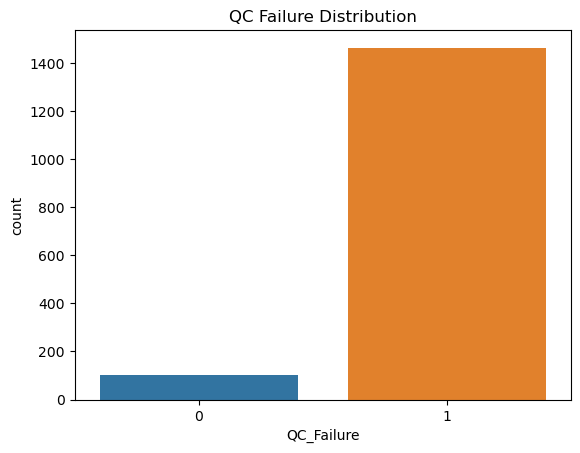

In [14]:
plt.figure()
sns.countplot(x="QC_Failure", data=qc_df)
plt.title("QC Failure Distribution")
plt.show()

11. Statistical Summary

In [15]:
qc_df.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
sensor_0,1561.0000,3014.4529,73.6218,2743.2400,2966.2600,3011.4900,3056.6500,3356.3500
sensor_1,1560.0000,2495.8502,80.4077,2158.7500,2452.2475,2499.4050,2538.8225,2846.4400
sensor_2,1553.0000,2200.5473,29.5132,2060.6600,2181.0444,2201.0667,2218.0555,2315.2667
sensor_3,1553.0000,1396.3766,441.6916,0.0000,1081.8758,1285.2144,1591.2235,3715.0417
sensor_4,1553.0000,4.1970,56.3555,0.6815,1.0177,1.3168,1.5257,1114.5366
sensor_5,1553.0000,100.0000,0.0000,100.0000,100.0000,100.0000,100.0000,100.0000
sensor_6,1553.0000,101.1129,6.2372,82.1311,97.9200,101.5122,104.5867,129.2522
sensor_7,1558.0000,0.1218,0.0090,0.0000,0.1211,0.1224,0.1238,0.1286
sensor_8,1565.0000,1.4629,0.0739,1.1910,1.4112,1.4616,1.5169,1.6564
sensor_9,1565.0000,-0.0008,0.0151,-0.0534,-0.0108,-0.0013,0.0084,0.0749


12. Distribution of a Few Sensors

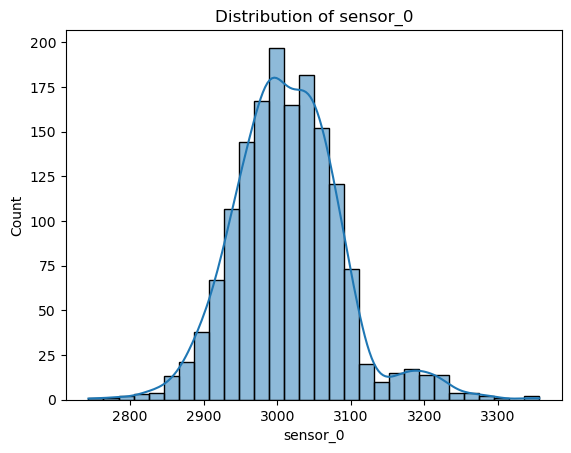

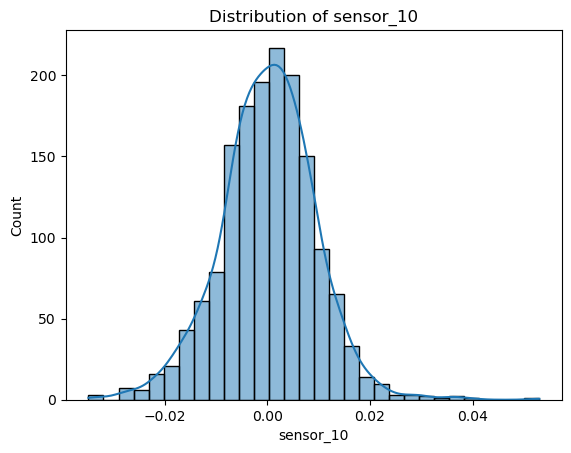

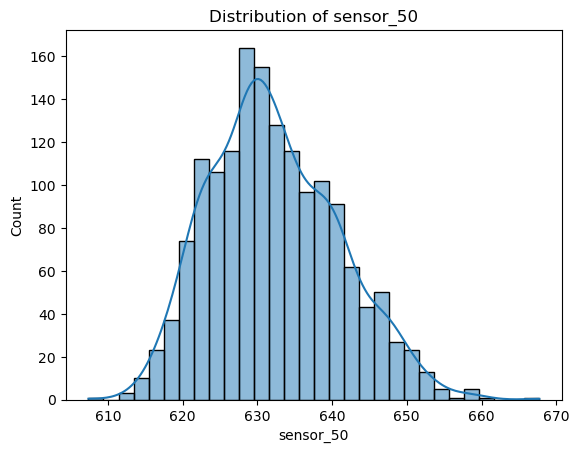

In [16]:
sample_sensors = ["sensor_0", "sensor_10", "sensor_50"]

for sensor in sample_sensors:
    plt.figure()
    sns.histplot(qc_df[sensor], bins=30, kde=True)
    plt.title(f"Distribution of {sensor}")
    plt.show()

13. Sensor vs QC Outcome

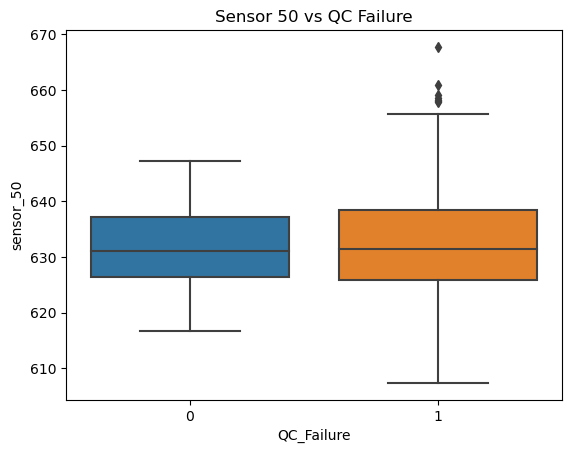

In [17]:
plt.figure()
sns.boxplot(
    x="QC_Failure",
    y="sensor_50",
    data=qc_df
)
plt.title("Sensor 50 vs QC Failure")
plt.show()

14. Correlation Check

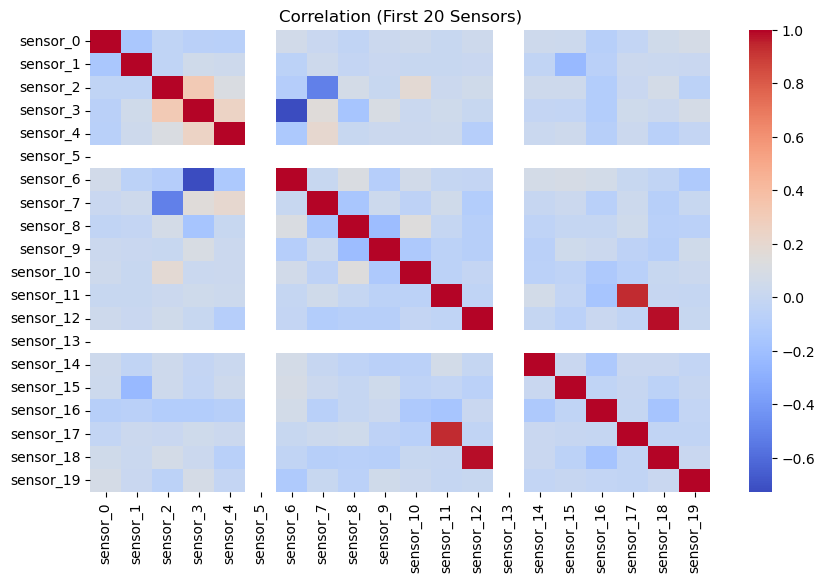

In [18]:
subset = qc_df.sample(300, random_state=42)

plt.figure(figsize=(10,6))
sns.heatmap(
    subset.iloc[:, :20].corr(),
    cmap="coolwarm"
)
plt.title("Correlation (First 20 Sensors)")
plt.show()

# PREPROCESSING & FEATURE ENGINEERING

1. Separate Features & Target

In [21]:
X = qc_df.drop(columns=["QC_Failure"])
y = qc_df["QC_Failure"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1567, 590)
Target shape: (1567,)


2. Drop Sensors with Extremely High Missing Values

In [22]:
missing_percentage = X.isnull().mean() * 100

high_missing_cols = missing_percentage[missing_percentage > 70].index
print(f"Dropping {len(high_missing_cols)} sensors with >70% missing values")

X = X.drop(columns=high_missing_cols)

X.shape

Dropping 8 sensors with >70% missing values


(1567, 582)

3. Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape)

(1253, 582) (314, 582)


4. Missing Value Imputation

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_train_imputed = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns
)

X_test_imputed = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns
)

5. Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_imputed),
    columns=X_train_imputed.columns
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_imputed),
    columns=X_test_imputed.columns
)

6. Dimensionality Reduction (PCA)

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Original features:", X_train_scaled.shape[1])
print("Reduced features after PCA:", X_train_pca.shape[1])

Original features: 582
Reduced features after PCA: 164


7. Baseline Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.07      0.14      0.10        21
           1       0.93      0.87      0.90       293

    accuracy                           0.82       314
   macro avg       0.50      0.51      0.50       314
weighted avg       0.88      0.82      0.85       314



8. Confusion Matrix Visualization

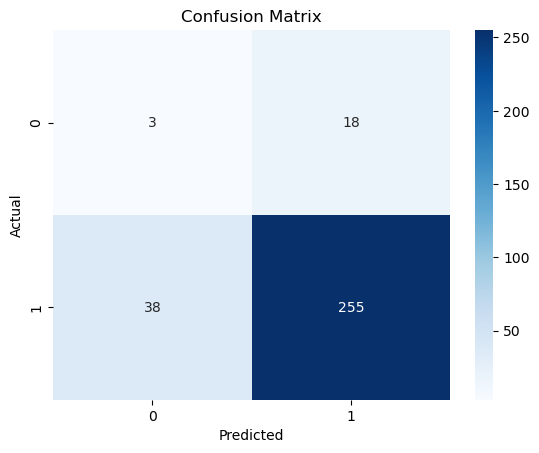

In [29]:
plt.figure()
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

9. Build PREPROCESSOR

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [36]:
numeric_features = X_train.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), numeric_features)
    ]
)

In [39]:
numeric_features = X_train.columns.tolist()

In [40]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features)
    ]
)

In [41]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ))
])

In [42]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['sensor_0', 'sensor_1',
                                                   'sensor_2', 'sensor_3',
                                                   'sensor_4', 'sensor_5',
                                                   'sensor_6', 'sensor_7',
                                                   'sensor_8', 'sensor_9',
                                                   'sensor_10', 'sensor_11',
                                                   'sensor_12', 'sensor_13',
                                                   'sensor_14', 'sensor_15',
                                                   'sensor_16', 'sensor_17',
                                                   'sensor_18', 'sensor_19',
                                                   'sensor_20', 'sensor_21',
                                                   'sensor_22', 'sensor_23',
                                                   'sensor_24', 'sensor_25',
                                                   'sensor_26', 'sensor_27',
                                                   'sensor_28', 'sensor_29', ...])])),
                ('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [43]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8789808917197452
              precision    recall  f1-score   support

           0       0.23      0.33      0.27        21
           1       0.95      0.92      0.93       293

    accuracy                           0.88       314
   macro avg       0.59      0.63      0.60       314
weighted avg       0.90      0.88      0.89       314



In [46]:
import pickle

In [49]:
import pickle

pickle.dump(pipe, open('pipe.pkl', 'wb'))
print("✅ Pipeline saved successfully as pipe.pkl")
print("✅ QC model pipeline saved successfully")

✅ Pipeline saved successfully as pipe.pkl
✅ QC model pipeline saved successfully
